In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Battery data/full_battery_data.csv")
print(f"✅ Loaded full dataset: {df.shape}")

✅ Loaded full dataset: (9047247, 7)


In [4]:
df.head()

,Time,Voltage,Current,Temperature,SOC,DriveCycle,TemperatureLabel
0,0.0,4.175155,-3.691549e-06,15.96381,1.0,PDTCB,15
1,0.1,4.175155,-9.512327e-07,15.96381,1.0,PDTCB,15
2,0.2,4.174967,-4.821614e-07,15.96381,1.0,PDTCB,15
3,0.3,4.175153,-2.413463e-07,15.96381,1.0,PDTCB,15
4,0.4,4.174966,-8.059866e-08,15.96381,1.0,PDTCB,15


In [5]:
df.tail()

,Time,Voltage,Current,Temperature,SOC,DriveCycle,TemperatureLabel
9047242,11025.7,2.656538,-3.350742,8.943850,0.125165,US06,5
9047243,11025.8,2.655582,-3.351976,8.943850,0.125146,US06,5
9047244,11025.9,2.654630,-3.353234,8.945311,0.125128,US06,5
9047245,11026.0,2.653594,-3.354528,8.947360,0.125109,US06,5
9047246,11026.1,2.450127,-9.408817,8.947360,0.125090,US06,5


In [6]:

if df["SOC"].max() > 1.0:
    df["SOC"] = df["SOC"] / 100.0

features = ['Voltage', 'Current', 'Temperature']
target = 'SOC'

X = df[features].values
y = df[target].values

In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"✅ Training size: {X_train.shape}, Test size: {X_test.shape}")


✅ Training size: (7237797, 3), Test size: (1809450, 3)


In [10]:

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='gpu_hist',        # Or 'gpu_hist' if using GPU
    predictor='auto',
    eval_metric='rmse',
    n_jobs=-1,
    random_state=42,
    verbosity=1
)


In [12]:
# Train model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=10
)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:0.25250
[10]	validation_0-rmse:0.15536
[20]	validation_0-rmse:0.11749
[30]	validation_0-rmse:0.08699
[40]	validation_0-rmse:0.05771
[50]	validation_0-rmse:0.04432
[60]	validation_0-rmse:0.03473
[70]	validation_0-rmse:0.02900
[80]	validation_0-rmse:0.02491
[90]	validation_0-rmse:0.02306
[100]	validation_0-rmse:0.02119
[110]	validation_0-rmse:0.01960
[120]	validation_0-rmse:0.01845
[130]	validation_0-rmse:0.01769
[140]	validation_0-rmse:0.01705
[150]	validation_0-rmse:0.01660
[160]	validation_0-rmse:0.01619
[170]	validation_0-rmse:0.01583
[180]	validation_0-rmse:0.01554
[190]	validation_0-rmse:0.01531
[200]	validation_0-rmse:0.01511
[210]	validation_0-rmse:0.01490
[220]	validation_0-rmse:0.01475
[230]	validation_0-rmse:0.01462
[240]	validation_0-rmse:0.01450
[250]	validation_0-rmse:0.01440
[260]	validation_0-rmse:0.01431
[270]	validation_0-rmse:0.01423
[280]	validation_0-rmse:0.01415
[290]	validation_0-rmse:0.01409
[299]	validation_0-rmse:0.01403


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, predictor='auto', ...)

In [13]:
# 6. Save model
joblib.dump(xgb_model, "xgboost_soc_model_.pkl")
print("✅ XGBoost model saved as 'xgboost_soc_model_9M.pkl'")

✅ XGBoost model saved as 'xgboost_soc_model_9M.pkl'


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [14]:
# Evaluate
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [15]:
print(f"📊 MAE:  {mae:.5f}")
print(f"📊 RMSE: {rmse:.5f}")
print(f"📊 R²:   {r2:.5f}")

📊 MAE:  0.00973
📊 RMSE: 0.01403
📊 R²:   0.99719


/tmp/ipython-input-16-1004661615.py:10: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


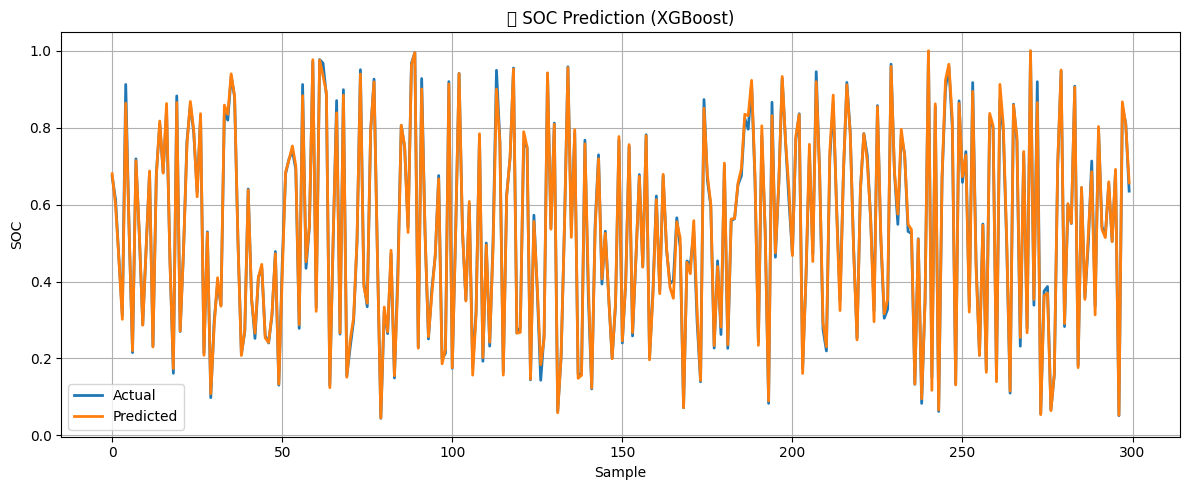

In [16]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred[:300], label='Predicted', linewidth=2)
plt.title("🔋 SOC Prediction (XGBoost)")
plt.xlabel("Sample")
plt.ylabel("SOC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-1265974182.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


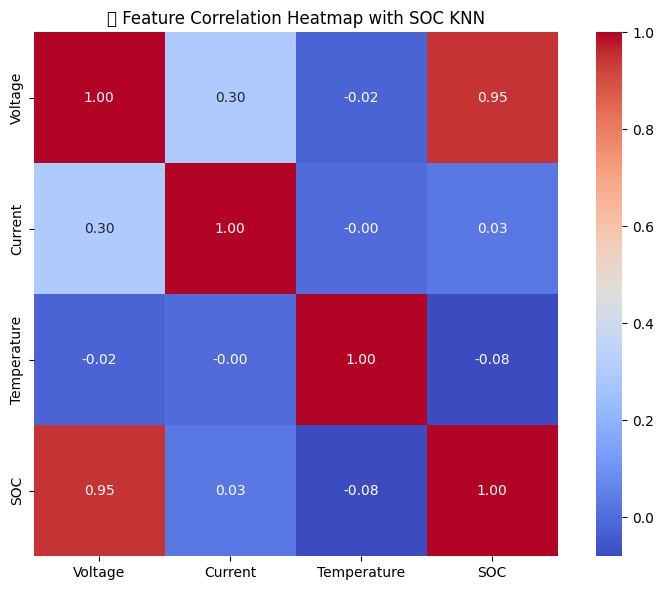

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = pd.DataFrame(X_test, columns=['Voltage', 'Current', 'Temperature'])
df_corr['SOC'] = y_test
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("📊 Feature Correlation Heatmap with SOC KNN")
plt.tight_layout()
plt.show()


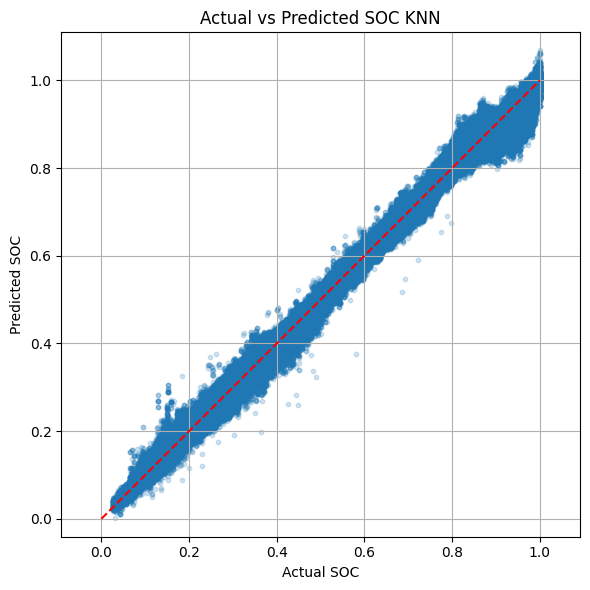

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2, s=10)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal line
plt.title("Actual vs Predicted SOC KNN")
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
